In [32]:
%reload_ext autoreload
%autoreload 2

import os
import pandas as pd
from tsfresh import extract_features
from glob import glob
from helper_functions import read_pickle
import talib as ta

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)


In [33]:
files = glob("data/*.pkl")

In [34]:
files

['data/NEOBTC-aggTrades-2019-09.pkl', 'data/ETHBTC-aggTrades-2019-09.pkl']

In [35]:
ethbtc = read_pickle(files[0])
neobtc = read_pickle(files[1])

Reading NEOBTC-aggTrades-2019-09.pkl...

NEOBTC-aggTrades-2019-09.pkl imported.

NEOBTC-aggTrades-2019-09.pkl has 147743 rows and 8 columns.
Reading ETHBTC-aggTrades-2019-09.pkl...

ETHBTC-aggTrades-2019-09.pkl imported.

ETHBTC-aggTrades-2019-09.pkl has 3450752 rows and 8 columns.


In [36]:
ethbtc.head()

,Aggregate tradeId,Price,Quantity,First TradeId,Last tradeId,Was the buyer the maker?,Was the trade the best price match?,Dollar Bars
Timestamp,,,,,,,,
2019-09-01 00:00:17.379,24390981,0.000916,0.40,28702492,28702492,True,True,0.000366
2019-09-01 00:02:04.312,24390982,0.000917,0.17,28702493,28702493,False,True,0.000156
2019-09-01 00:03:19.487,24390983,0.000917,34.20,28702494,28702495,False,True,0.031361
2019-09-01 00:03:24.906,24390984,0.000917,1.05,28702496,28702496,False,True,0.000963
2019-09-01 00:03:25.015,24390985,0.000917,2.16,28702497,28702497,False,True,0.001981


<AxesSubplot:xlabel='Timestamp'>

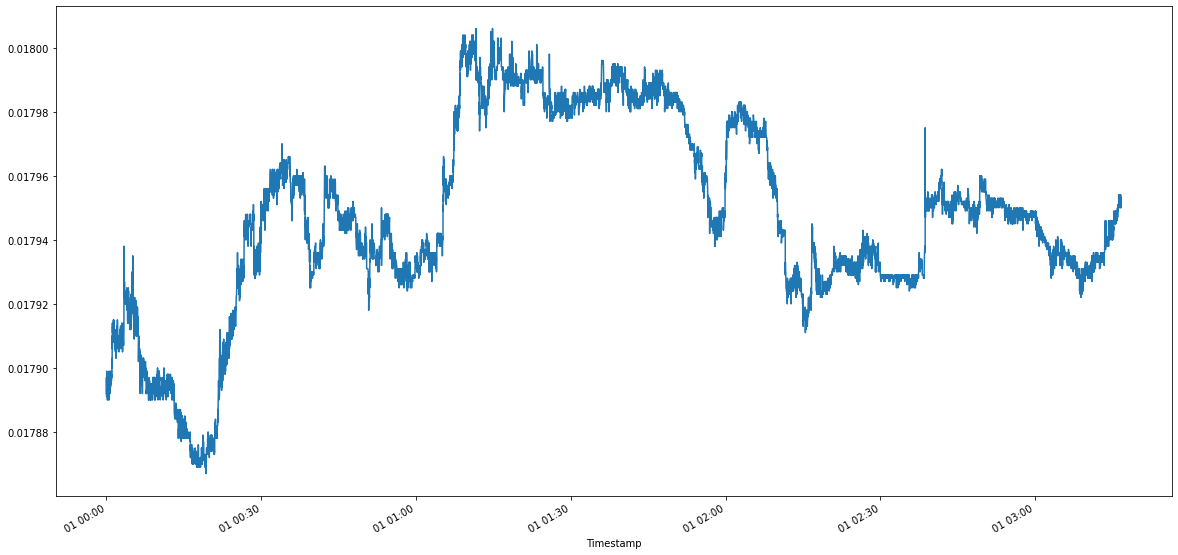

In [39]:
neobtc['Price'].head(10000).plot()

In [19]:
ethbtc["RSI"] = ta.RSI(ethbtc["Price"], timeperiod=100)

In [16]:
indicator = pd.DataFrame(dict(upper=u, middle=m, lower=l))

In [17]:
ethbtc = pd.concat([ethbtc, indicator], axis=1)

In [29]:
ethbtc.head()

,Aggregate tradeId,Price,Quantity,First TradeId,Last tradeId,Was the buyer the maker?,Was the trade the best price match?,Dollar Bars,std,mean,RSI,Dollar Bar Returns,corr
Timestamp,,,,,,,,,,,,,
2019-09-01 00:00:00.332,128418706,0.017892,0.898,141149764,141149765,True,True,0.016067,NaN,NaN,NaN,NaN,NaN
2019-09-01 00:00:00.847,128418707,0.017895,1.575,141149766,141149766,True,True,0.028185,NaN,NaN,NaN,0.754192,NaN
2019-09-01 00:00:00.930,128418708,0.017897,0.073,141149767,141149767,False,True,0.001306,0.013461,0.015186,NaN,-0.953646,1.0
2019-09-01 00:00:02.842,128418709,0.017891,0.018,141149768,141149768,True,True,0.000322,0.015810,0.009938,NaN,-0.753507,1.0
2019-09-01 00:00:03.771,128418710,0.017896,0.018,141149769,141149769,False,True,0.000322,0.000568,0.000650,NaN,0.000279,1.0


array([<AxesSubplot:xlabel='Timestamp'>, <AxesSubplot:xlabel='Timestamp'>],
      dtype=object)

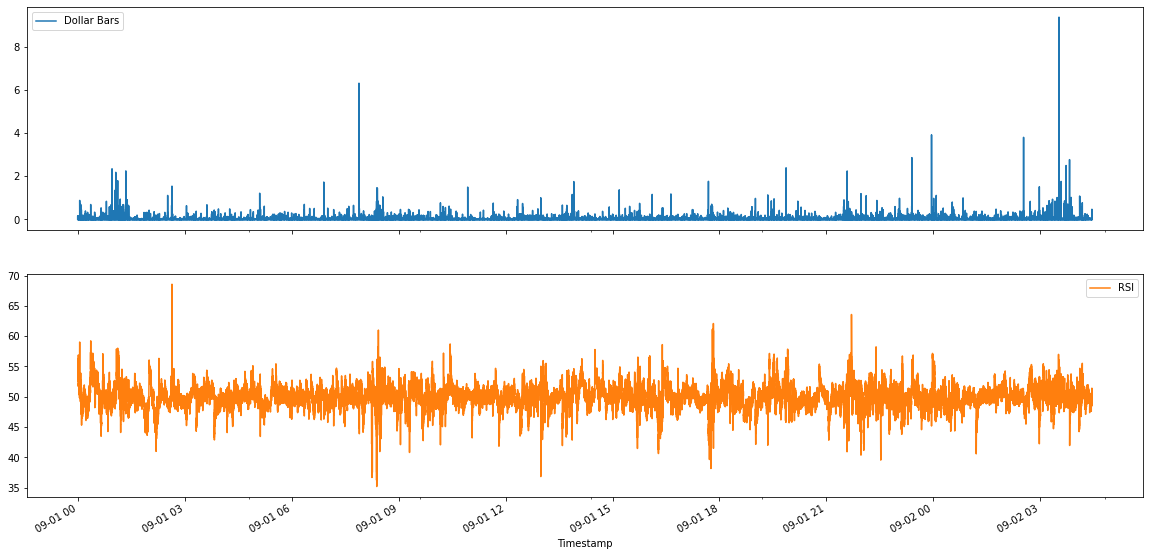

In [22]:
ethbtc[["Dollar Bars", "RSI"]].head(100000).plot(subplots=True)

In [27]:
ethbtc['std'] = ethbtc["Dollar Bars"].rolling(3).std()
ethbtc['mean'] = ethbtc["Dollar Bars"].rolling(3).mean()
ethbtc['corr'] = ethbtc["Dollar Bars"].rolling(3).corr()


In [25]:
ethbtc['Dollar Bar Returns'] = ethbtc['Dollar Bars'].pct_change()

<AxesSubplot:xlabel='Timestamp'>

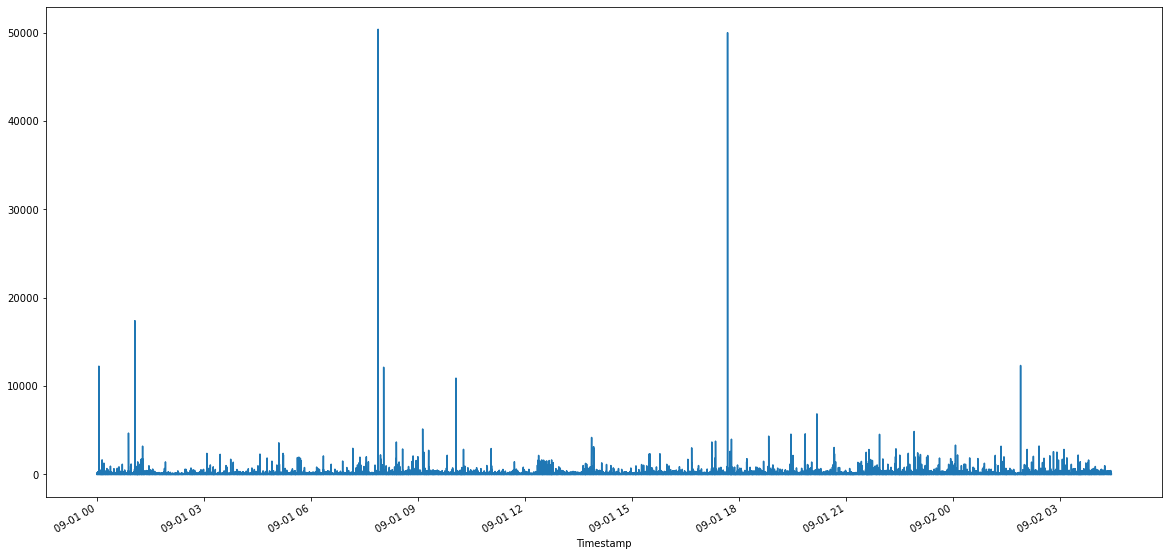

In [26]:
ethbtc["Dollar Bar Returns"].head(100000).plot()

<AxesSubplot:xlabel='Timestamp'>

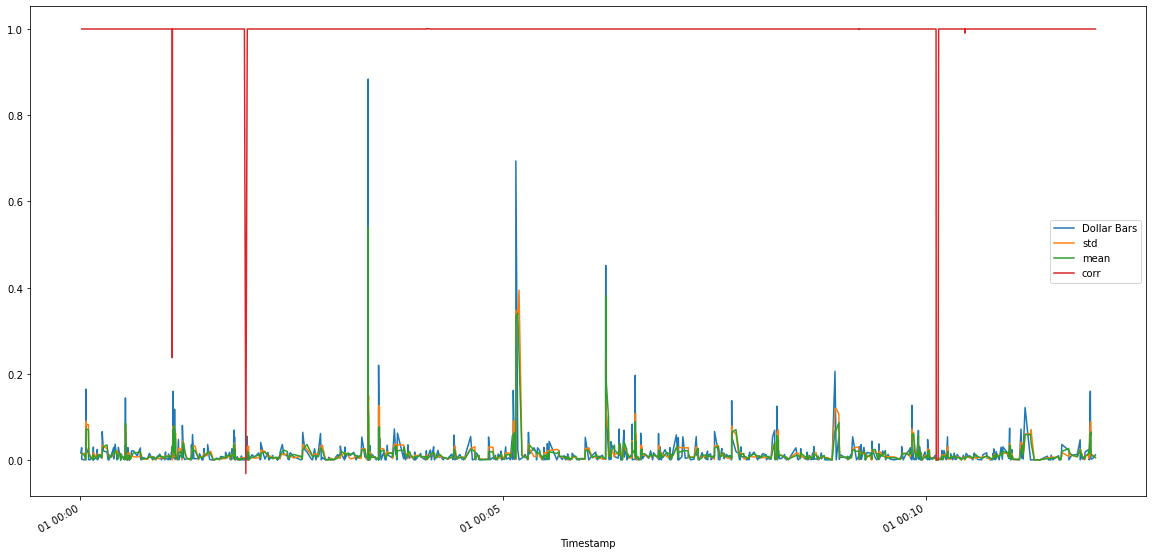

In [28]:
ethbtc[["Dollar Bars", 'std', 'mean', 'corr']].head(1000).plot()